Author: Ahmed Sobhi

Creation_date: 16th June 2023

Objective: Data EDA.

## Importing Required libararies and packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# For iteration visulization purpose
from tqdm import tqdm

## Loading Dataset

In [9]:
# Loading dataset
df = (
    pd.read_csv('../data/intermid/DS-task-data-cleaned.csv')
    .assign(
        priced_at= lambda x: pd.to_datetime(x.priced_at)
    )
)

# Load extra_features dataset
df_extrafeatures = pd.read_csv('../data/intermid/features_ohe.csv')

# Display first 5 rows
display(df.head(3))

display(df_extrafeatures.head(3))

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26


,id,extra_features_lst,extra_features_count,abs,airbags,airconditioning,alarm,alarm/anti-theftsystem,alloywheels,am/fmradio,...,sensors,sideairbag,startengine,steptronic,sunroof,tintedglass,touchactivateddoorlock,touchscreen,tractioncontrol,usb
0,0,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,['abs' 'airconditioning' 'airbags' 'alarm/anti...,8,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18641 entries, 0 to 18640
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18641 non-null  int64         
 1   make                  18641 non-null  object        
 2   model                 18641 non-null  object        
 3   model_year            18641 non-null  int64         
 4   kilometers            18641 non-null  float64       
 5   transmission_type     18641 non-null  object        
 6   price                 18641 non-null  int64         
 7   priced_at             18641 non-null  datetime64[ns]
 8   mileage_category      18641 non-null  object        
 9   extra_features_count  18641 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [4]:
# display dataframe statics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18641.0,10036.755646,5800.797785,0.0,5033.0,10036.0,15034.0,20097.0
model_year,18641.0,2016.377501,4.321064,1999.0,2014.0,2017.0,2020.0,2023.0
kilometers,18641.0,94673.422456,59974.665626,0.0,43000.0,90000.0,139999.0,285000.0
price,18641.0,274339.091250,128450.028610,10000.0,181000.0,248000.0,337000.0,1384000.0
extra_features_count,18641.0,12.451585,7.790864,1.0,6.0,9.0,18.0,39.0


## Univariate EDA

### Numerical Features

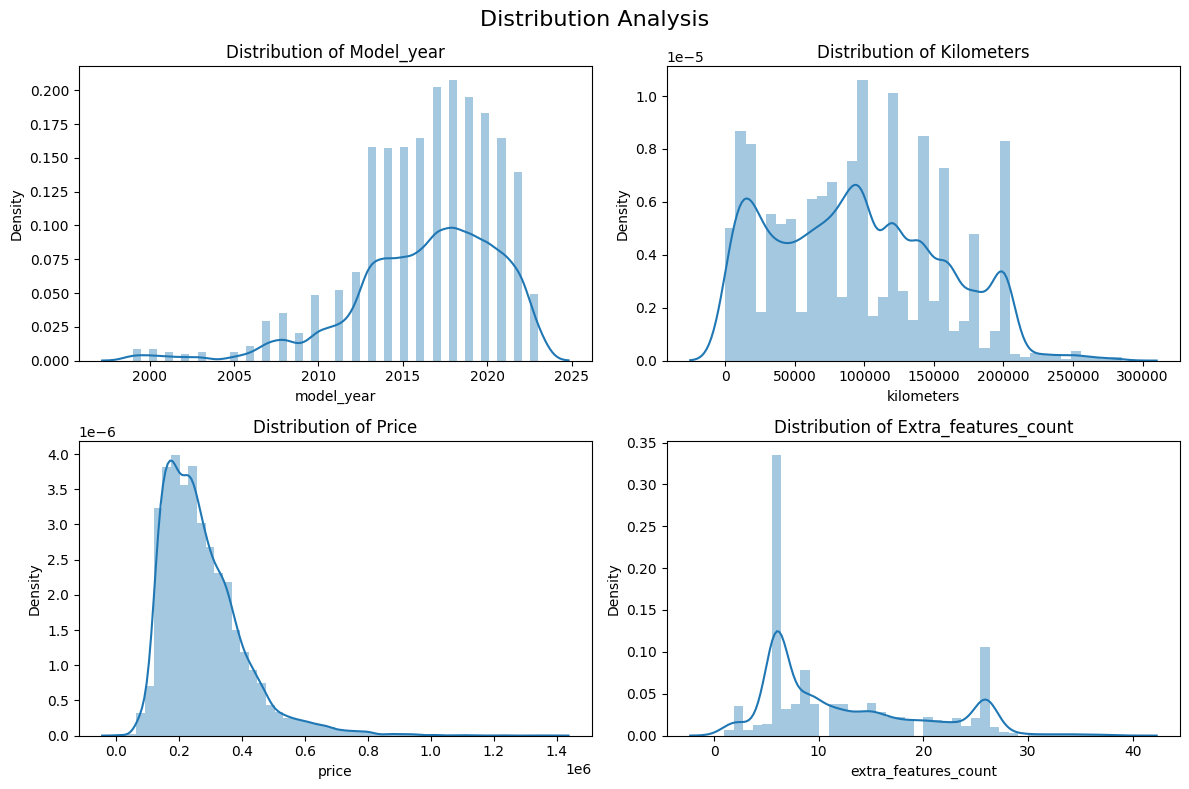

In [8]:
# Used to look at the distribution of a numerical variables
features_numeric = df.drop('id', axis=1).select_dtypes('number').columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = int(len(features_numeric) / 2) + len(features_numeric) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over features and plot distplot on subplots
for i, feature in enumerate(features_numeric):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.distplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')

# Remove empty subplots if necessary
if len(features_numeric) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Set title for the whole plot
fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
plt.savefig('../report/plots/numerical_distribution.jpg')
plt.show()

Insigts:
- There are skewness in {price, model_year, extra_features_count} features.

### Categorical and binary features

In [ ]:
# Countplot extra_features
df_extrafeatures.drop(['extra_features_lst', 'extra_features_count'], axis=1)

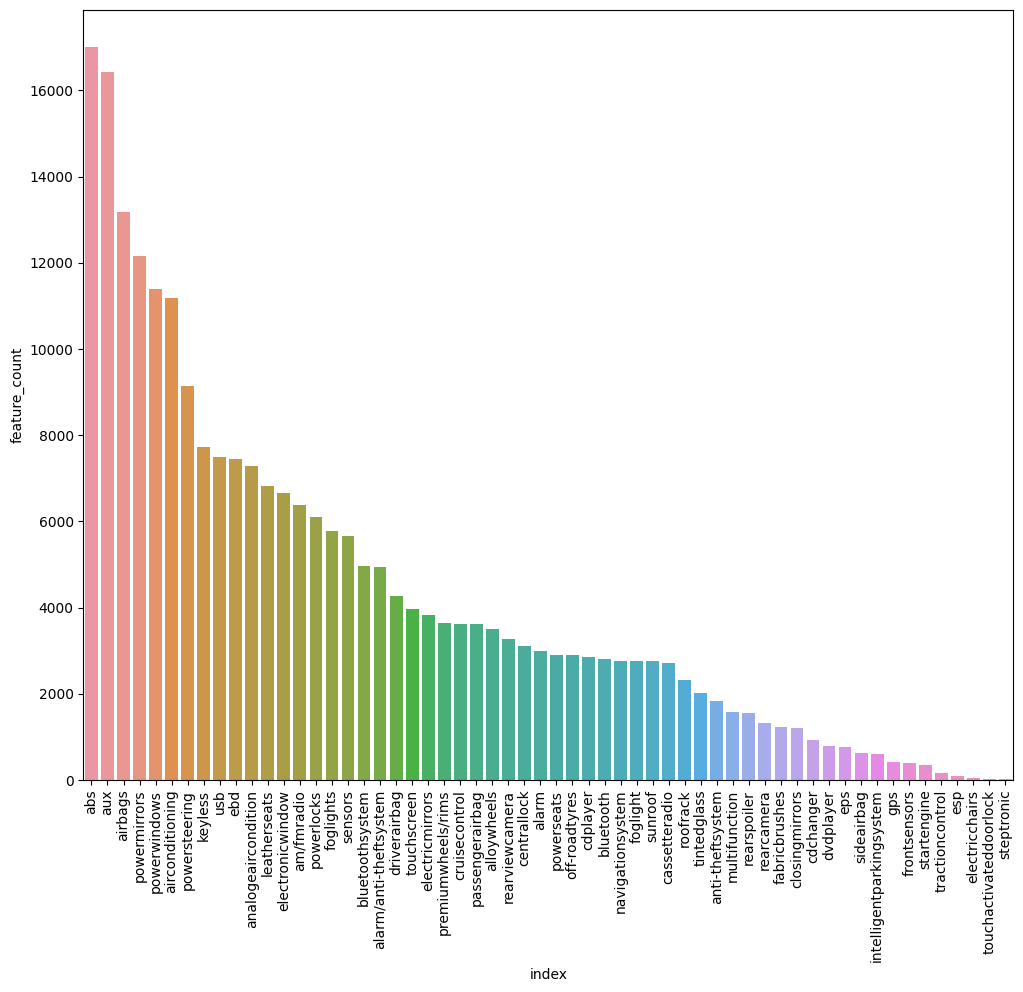

In [27]:
# What are the most common extra features in each car.
df_features_count = (
    df_extrafeatures
    .drop(['id', 'extra_features_lst', 'extra_features_count'], axis=1)
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='feature_count')
)

plt.figure(figsize=(12, 10))
sns.barplot(data=df_features_count, x='index', y='feature_count')
plt.xticks(rotation=90)
plt.savefig('../report/plots/features_countplot.jpg')
plt.show()

In [26]:
print('Top Ten Most Common Car Features:')
df_features_count.head(10)

Top Ten Most Common Car Features:


,index,feature_count
0,abs,17016
1,aux,16435
2,airbags,13177
3,powermirrors,12153
4,powerwindows,11391
5,airconditioning,11185
6,powersteering,9138
7,keyless,7734
8,usb,7489
9,ebd,7441


- Price trend
- How many records per model
- Most common features

Feature eng:
- Moving average of price by x month.
- Car age.
- 

## Feature Engineering

### Car Age
- Describe the Age of car at the time of pricing.

In [5]:
# Car age at time the price was placed
df['model_age'] = df['priced_at'].dt.year - df['model_year']

# Dispaly head of df
df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,0.0,14
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,0.0,14
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,0.0,13
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,0.0,12
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,8.0,11


### Price Moving Average.

In [7]:
# Price Moving Average
window_size = 3

df['price_moving_avg'] = (
    df.groupby('model')['price']
    .apply(
        lambda x: x.shift().rolling(window=window_size, min_periods=1).mean()
        )
    .fillna(method='bfill')
    .astype(int)
)

# Display head of dataframe
df.head()

/tmp/ipykernel_123842/3046543938.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('model')['price']


,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,0.0,14,115000
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,0.0,14,115000
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,0.0,13,115500
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,0.0,12,156666
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,8.0,11,183333
